In [3]:
import matplotlib.pyplot as plt
import matplotlib
import os
import pandas as pd
import numpy as np
%matplotlib inline
matplotlib.style.use('ggplot')
import datetime
import locale
import time
locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')

'es_ES.UTF-8'

In [4]:
product = 'patata'
tipo = 'production'
pwd = '/Volumes/Macintosh HD/_GitHub/journey-of-food/data/producto/'

In [5]:
products = os.listdir(pwd)[1:]

In [6]:
os.chdir(pwd+product+'/'+tipo)
files = os.listdir()
files

['exec13_6.27.3.xlsx',
 'exec13_6.27.4 (1).xlsx',
 'grafico.csv',
 'principal_provincia_peninsula.csv',
 'production_ready_INE.csv',
 'tomate.png',
 'total.csv']

In [7]:
data = pd.read_excel('exec13_3.2.4 2.xlsx',skiprows=[0,1,2,3,4,5,6], encoding ='utf-8')
data.fillna(0,inplace=True)

In [9]:
data.head(2)

Index(['Unnamed: 0', '(hectáreas)', '(toneladas)', '(hectáreas).1',
       '(toneladas).1', '(hectáreas).2', '(toneladas).2'],
      dtype='object')

In [24]:
data[data.columns[0]]

0                A Coruña
1                    Lugo
2                 Ourense
3              Pontevedra
4                 GALICIA
5                       0
6          P. DE ASTURIAS
7                       0
8               CANTABRIA
9                       0
10                  Alava
11              Guipúzcoa
12                Vizcaya
13             PAÍS VASCO
14                      0
15                NAVARRA
16                      0
17               LA RIOJA
18                      0
19                 Huesca
20                 Teruel
21               Zaragoza
22                 ARAGÓN
23                      0
24              Barcelona
25                 Girona
26                 Lleida
27              Tarragona
28               CATALUÑA
29                      0
             ...         
48            Guadalajara
49                 Toledo
50     CASTILLA-LA MANCHA
51                      0
52               Alicante
53              Castellón
54               Valencia
55          

In [33]:
dataClean = pd.DataFrame([data[data.columns[0]], data[data.columns[-1]]]).transpose()

In [34]:
dataClean.head()

,Unnamed: 0,(toneladas).3
0,A Coruña,1026
1,Lugo,11619
2,Ourense,11964
3,Pontevedra,369
4,GALICIA,24978


In [35]:
data.head()

,Unnamed: 0,(hectáreas),(toneladas),(hectáreas).1,(toneladas).1,(hectáreas).2,(toneladas).2,(hectáreas).3,(toneladas).3
0,A Coruña,31,520,598,11787,5160,112952,52,1026
1,Lugo,–,–,147,2608,3506,71978,619,11619
2,Ourense,–,–,86,2085,5562,211653,618,11964
3,Pontevedra,37,648,701,12919,2209,53054,22,369
4,GALICIA,68,1168,1532,29399,16437,449637,1311,24978


In [336]:
data.columns = ['Provincia','S-ha_15/12-15/4','P-t_15/12-15/4','S-ha_15/4-15/6','P-t_15/4-15/6','S-ha_15/6-15/9','P-t_15/6-15/9','S-ha_15/9-15/1','P-t_15/9-15/1']

In [337]:
data = data.loc[data.Provincia!=0]
data = data.loc[data['Provincia'] != ' GALICIA']
data = data.loc[data['Provincia'] != ' PAÍS VASCO']
data = data.loc[data['Provincia'] != ' ARAGÓN']
data = data.loc[data['Provincia'] != ' CATALUÑA']
data = data.loc[data['Provincia'] != ' CASTILLA Y LEÓN']
data = data.loc[data['Provincia'] != ' CASTILLA-LA MANCHA']
data = data.loc[data['Provincia'] != ' C. VALENCIANA']
data = data.loc[data['Provincia'] != ' EXTREMADURA']
data = data.loc[data['Provincia'] != ' ANDALUCÍA']
data = data.loc[data['Provincia'] != ' CANARIAS']
data = data.loc[data['Provincia'] != ' C. VALENCIANA']
data = data.loc[data['Provincia'] != 'ESPAÑA']
data = data.loc[data['Provincia'] != 'Las Palmas']
data = data.loc[data['Provincia'] != 'S.C. de Tenerife']

In [338]:
provincias = pd.read_csv(pwd+'provincias.csv', delimiter='\t',index_col=1)

In [339]:
data.Provincia = data.Provincia.apply(lambda x: x.upper())

In [340]:
data['INE'] = data.Provincia.map(provincias.ID)

In [341]:
data.replace('–',0,inplace=True)

In [342]:
provincias_name = provincias = pd.read_csv(pwd+'provincias_nombre.csv',index_col=1)

In [343]:
data.Provincia = data.INE.map(provincias_name.ID)

In [344]:
#data = data.loc[data.index<73]

In [345]:
data.loc[71] = ['Ceuta',0,0,0,0,0,0,0,0,0]
data.loc[72] = ['Melilla',0,0,0,0,0,0,0,0,0]
data

,Provincia,S-ha_15/12-15/4,P-t_15/12-15/4,S-ha_15/4-15/6,P-t_15/4-15/6,S-ha_15/6-15/9,P-t_15/6-15/9,S-ha_15/9-15/1,P-t_15/9-15/1,INE
0,A Coruña,31,520,598,11787,5160,112952,52,1026,15
1,Lugo,0,0,147,2608,3506,71978,619,11619,27
2,Ourense,0,0,86,2085,5562,211653,618,11964,32
3,Pontevedra,37,648,701,12919,2209,53054,22,369,36
6,Asturias,0,0,0,0,900,18000,0,0,33
8,Cantabria,0,0,0,0,30,750,112,2800,39
10,Araba/Álava,0,0,0,0,380,16720,853,34459,1
11,Gipuzkoa,0,0,25,513,140,3314,0,0,20
12,Bizkaia,0,0,80,1680,120,3132,10,243,48
15,Navarra,0,0,0,0,206,7063,253,5478,31


In [346]:
data.to_csv(product+'_production_ready_INE.csv', encoding='utf-8')

In [292]:
dataMelt = pd.melt(data, id_vars='Provincia', value_vars=['S-ha_15/12-15/4','P-t_15/12-15/4','S-ha_15/4-15/6','P-t_15/4-15/6','S-ha_15/6-15/9','P-t_15/6-15/9','S-ha_15/9-15/1','P-t_15/9-15/1'])

In [293]:
dataMelt['Unit'] = dataMelt['variable']
dataMelt['Unit'] = dataMelt['Unit'].apply(lambda x: x.split('_')[0])
dataMelt['variable'] = dataMelt['variable'].apply(lambda x: x.split('_')[1])

In [294]:
dataMelt.columns =['Provincia', 'Variable', 'Cantidad', 'Unit']

In [295]:
dataMelt['nonumeric'] = dataMelt.Cantidad.apply(lambda x: isinstance(x, int))

In [296]:
dataMelt = dataMelt.loc[dataMelt.nonumeric == True]

In [297]:
dataMelt.drop('nonumeric', axis=1, inplace=True)

In [298]:
dataMelt.to_csv(product+'_production_ready_melt.csv', encoding='utf-8')

In [299]:
dataMelt['Cantidad'] = dataMelt['Cantidad'].astype('int')*1000.0

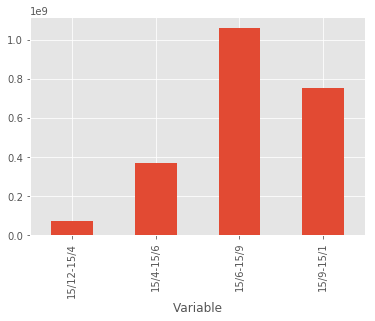

In [300]:
dataMelt.pivot_table(index='Variable', values='Cantidad', aggfunc='sum').Cantidad.plot('bar')

In [301]:
dataMelt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384 entries, 0 to 383
Data columns (total 4 columns):
Provincia    384 non-null object
Variable     384 non-null object
Cantidad     384 non-null float64
Unit         384 non-null object
dtypes: float64(1), object(3)
memory usage: 15.0+ KB
